In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

def process_image(path):
    image = cv2.imread(path, 0)
    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.show()
    kernel_sizes = [5, 15, 25]
    for kernel_size in kernel_sizes:
        convolution(image, gaussian_kernel(kernel_size, math.sqrt(kernel_size)))

In [2]:
def distribution(x, mu, sd):
    return (1 / (np.sqrt(2 * np.pi) * sd)) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [3]:
def gaussian_kernel(size, sigma):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = distribution(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.sum()
    return kernel_2D

In [4]:
def get_padded_image(image, image_row, image_col, kernel_row, kernel_col):
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    return padded_image

In [5]:
def convolution(image, kernel):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    result_image = np.zeros(image.shape)
    
    padded_image = get_padded_image(image, image_row, image_col, kernel_row, kernel_col)
    
    for row in range(image_row):
        for col in range(image_col):
            result_image[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col]) / kernel.shape[0] * kernel.shape[1]
    
    plt.imshow(result_image, cmap='gray')
    plt.title(f"Output Image using {kernel_row}X{kernel_col} Kernel")
    plt.show()

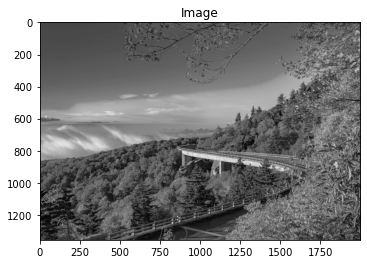

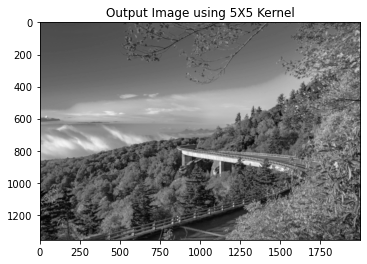

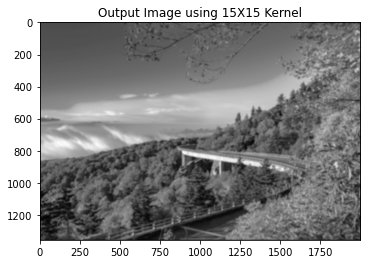

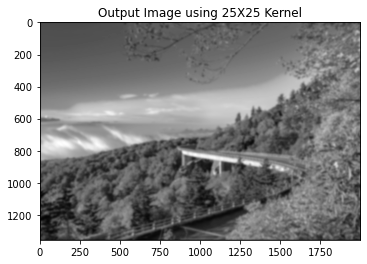

In [6]:
process_image('C:/Users/bogda/Documents/CV/image1.jpg')

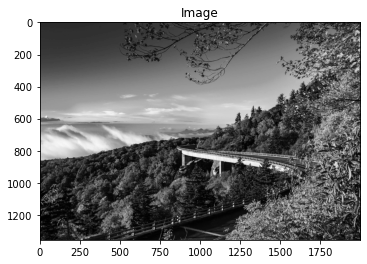

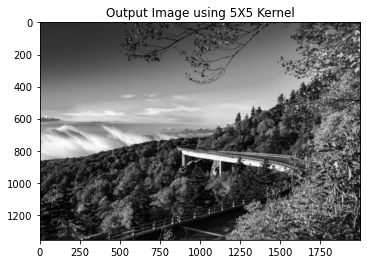

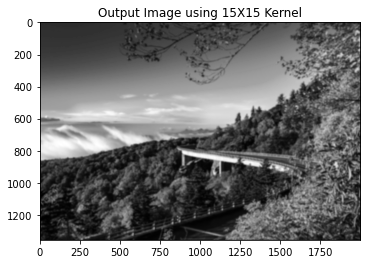

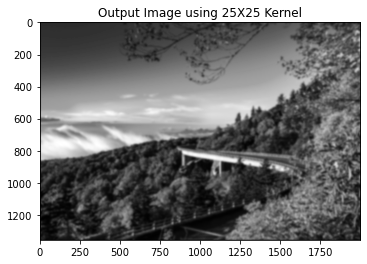

In [7]:
process_image('C:/Users/bogda/Documents/CV/image2.jpg')

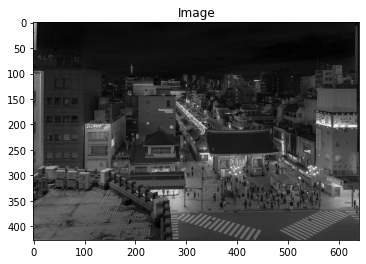

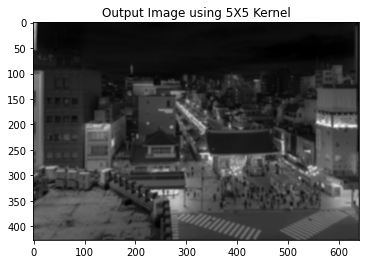

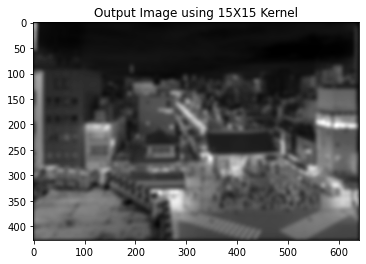

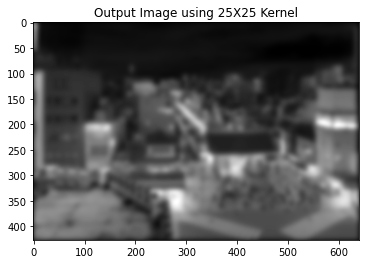

In [8]:
process_image('C:/Users/bogda/Documents/CV/image3.jpg')

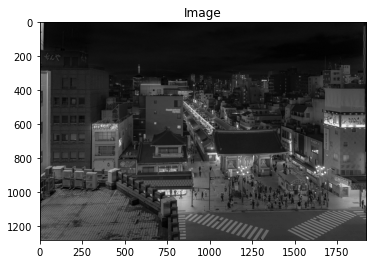

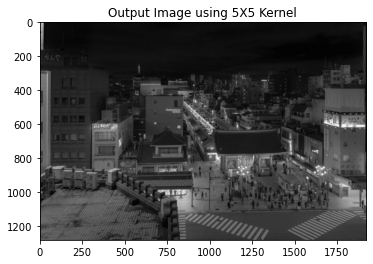

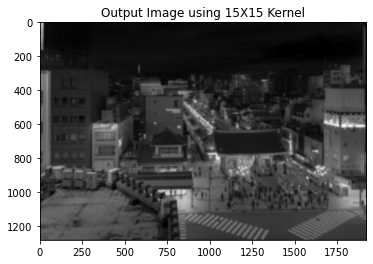

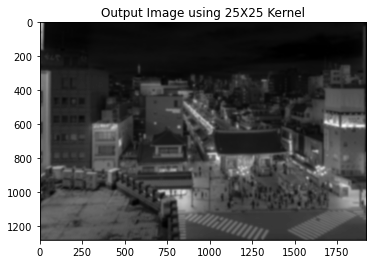

In [9]:
process_image('C:/Users/bogda/Documents/CV/image4.jpg')